In [2]:
import numpy as np
import matplotlib.pyplot as plt

from hcipy import *
from hcipy.mode_basis import zernike_ansi

In [262]:
D = 0.03
f = 51.0
wl = 1.55e-6
F = f / 3.0

pupil_grid = make_pupil_grid(512, diameter=D)
telescope_pupil_generator = make_circular_aperture(diameter=D)
telescope_pupil = telescope_pupil_generator(pupil_grid)

In [263]:
phase = zernike_ansi(6, D=D)(pupil_grid)
aberration = np.exp(1j * 0.6 * phase)
wavefront = Wavefront(telescope_pupil * aberration, wavelength=wl)

ds = 0.25e-6 # the grid resolution expected by Lightbeam
grid_width = 10.0e-6 # the cladding radius for the PL; we'll pad this with zeros later
q = wl * F / ds
num_airy = grid_width / (wl * F)

focal_grid = make_focal_grid(q=q, num_airy=num_airy, spatial_resolution=ds*q)
prop = FraunhoferPropagator(pupil_grid, focal_grid)
focal_image = prop.forward(wavefront)

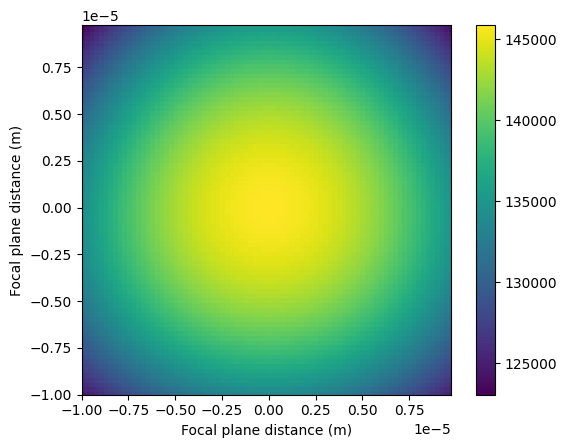

In [264]:
imshow_field(focal_image.intensity)
plt.xlabel('Focal plane distance (m)')
plt.ylabel('Focal plane distance (m)')
plt.colorbar()
plt.show()

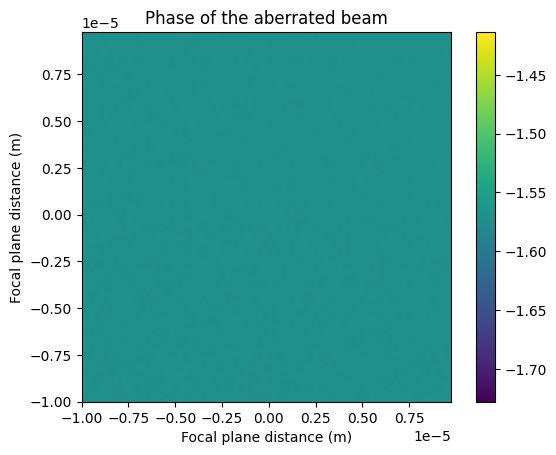

In [265]:
imshow_field(focal_image.phase)
plt.xlabel('Focal plane distance (m)')
plt.ylabel('Focal plane distance (m)')
plt.title("Phase of the aberrated beam")
plt.colorbar()
plt.show()
